#  `Oil | Water` Production Prediction
- In this notebook i will try to predict the oil and water production using the published volve produciton dataset
- The sequence is as follow:
    - First filter dataset to deal with just one well
    - Discover the dataset and the relations between features and production `oil|water`
    - clean and process the data for machine learning models
    - apply machine learning models
        - randomly choose the train and test samples and predict the prodcution
        - train the ML model on the past data and use the model for forecasting ` Test data only in the future`
        - try different models like [ linearRegressoin, XGBoost , RandomForest ]

## <div style="background-color:#F1C40F;padding:15px;border-radius:10px;text-align:center"> Filter for one well and discover the data </div>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as ms

In [3]:
df = pd.read_excel("Volve production data.xlsx",parse_dates=True)

In [4]:
# all wells in the dataset
df["WELL_BORE_CODE"].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [5]:
# filter for only one well
df = df[df["WELL_BORE_CODE"] == 'NO 15/9-F-14 H']

In [6]:
# have a quick look at the data , columns, dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3056 entries, 4967 to 8022
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   NPD_WELL_BORE_CODE        3056 non-null   int64         
 3   NPD_WELL_BORE_NAME        3056 non-null   object        
 4   NPD_FIELD_CODE            3056 non-null   int64         
 5   NPD_FIELD_NAME            3056 non-null   object        
 6   NPD_FACILITY_CODE         3056 non-null   int64         
 7   NPD_FACILITY_NAME         3056 non-null   object        
 8   ON_STREAM_HRS             3056 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 11  AVG_DP_TUBING             3050 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [7]:
# have a quick look at the data distribution
df.describe()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056,3056.0,3056.0,3056.0,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,2012-06-04 14:32:40.209423872,5351.0,3420717.0,369304.0,20.541124,233.074650,95.133792,192.653083,10.527984,69.390287,41.530600,77.103031,15.435757,1289.997837,189139.248043,2330.251878,NaN
min,2008-02-12 00:00:00,5351.0,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.190000,NaN
25%,2010-03-24 18:00:00,5351.0,3420717.0,369304.0,24.000000,237.493045,99.620673,180.749433,0.000000,43.014155,31.020474,81.223317,2.665658,209.862500,31304.035000,695.592500,NaN
50%,2012-06-10 12:00:00,5351.0,3420717.0,369304.0,24.000000,246.776063,101.007540,204.247625,12.968633,71.012952,33.545751,86.963304,7.177533,880.785000,142362.865000,2965.715000,NaN
75%,2014-08-15 06:00:00,5351.0,3420717.0,369304.0,24.000000,261.970976,105.049314,229.632848,21.231843,100.000000,49.080514,88.538931,21.173839,2033.697500,305327.862500,3444.147500,NaN
max,2016-09-17 00:00:00,5351.0,3420717.0,369304.0,25.000000,334.656140,106.772733,302.109760,26.682243,100.000000,125.718570,93.509584,125.718570,5644.370000,789974.730000,5691.770000,NaN
std,NaN,0.0,0.0,0.0,7.881214,64.923764,25.846815,57.736985,9.704604,31.064575,22.719568,25.615703,19.965154,1298.358922,184204.114106,1462.934595,NaN


#### WE all know that with time the oil produciton decrese and water prodcution increase incase of like `water-drive reservoir`

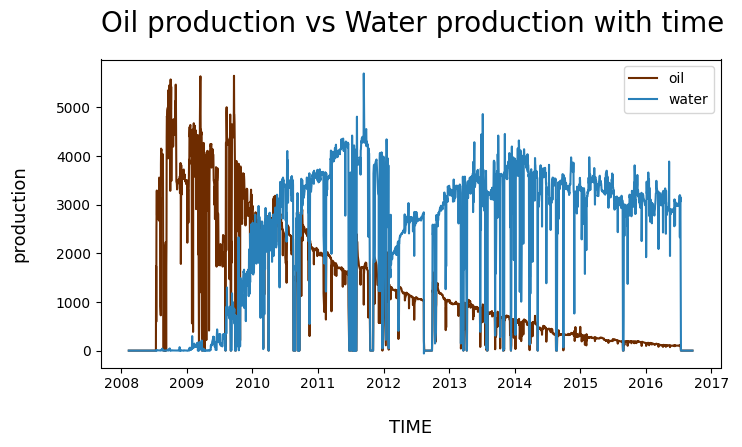

In [8]:

# main figure object
plt.figure(figsize= (8,4))
# make scatter plot between oil and gas production
plt.plot( df["DATEPRD"], df["BORE_OIL_VOL"],color="#6E2C00",label="oil") 
plt.plot(df["DATEPRD"],df["BORE_WAT_VOL"],color="#2980B9",label="water");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20)
plt.ylabel("production", fontsize= 13, labelpad = 20,loc="center")

# setting figure title 
plt.title("Oil production vs Water production with time ", fontsize= 20, pad = 20,loc="left")

plt.legend();

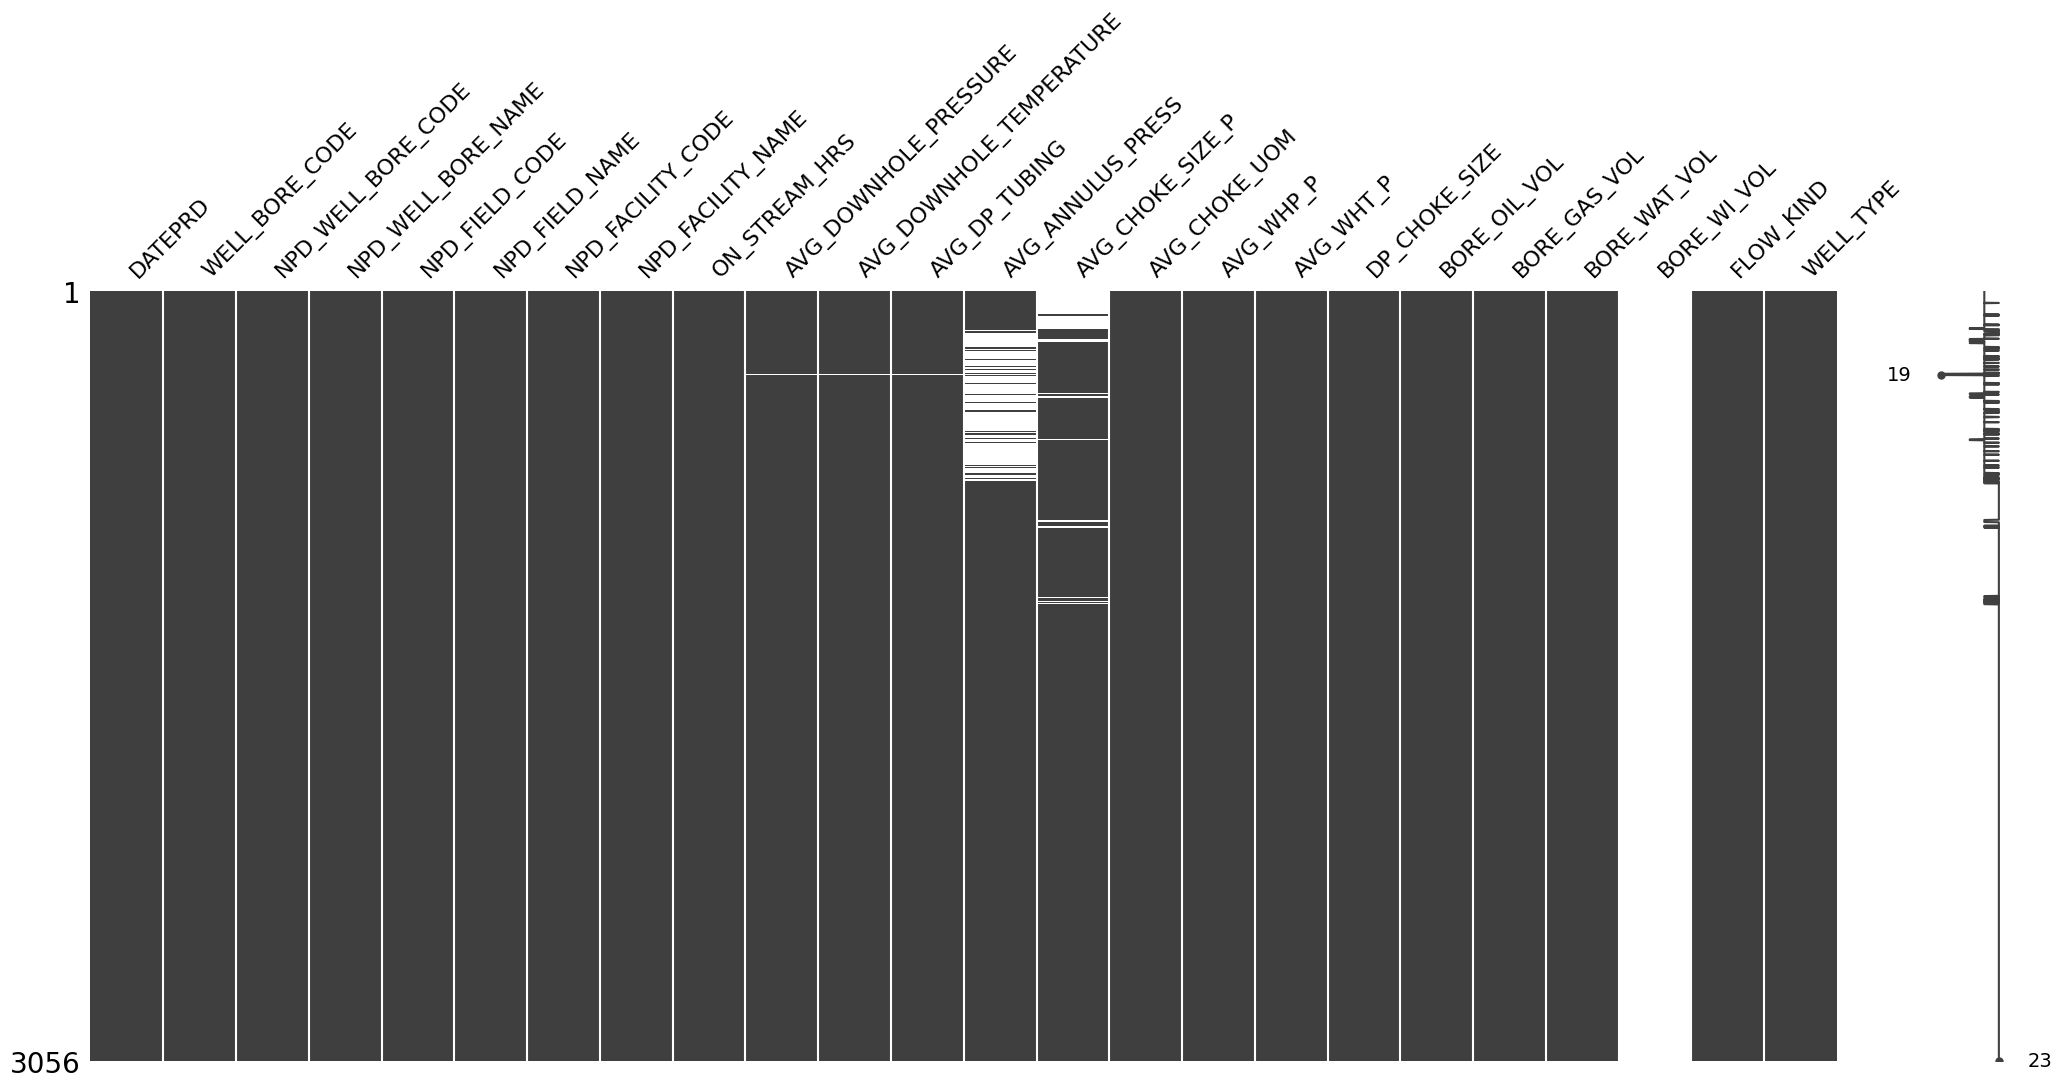

In [9]:
# have a look at the missing valeus in the data 
ms.matrix(df);

In [10]:
df= df[
    ['DATEPRD','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING'
     ,'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_OIL_VOL', 'BORE_WAT_VOL']
].dropna()

In [11]:
# show how many na values in each column
df.isna().sum()

DATEPRD                     0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [12]:
# convert oil and water volumes into rates 
df = df[df["ON_STREAM_HRS"] > 0] # to remove rows that represents no procution
df["oil_rate"] = (df["BORE_OIL_VOL"] / df["ON_STREAM_HRS"]) # get the oil produciton rate
df["water_rate"] = (df["BORE_WAT_VOL"] / df["ON_STREAM_HRS"]) # get the oil produciton rate
df.drop(columns=["ON_STREAM_HRS"],inplace=True) # remove the hours of procution as we don't need it any more

In [13]:
# drop the oil_volume and water volume also
df.drop(columns=["BORE_OIL_VOL","BORE_WAT_VOL"],inplace=True)

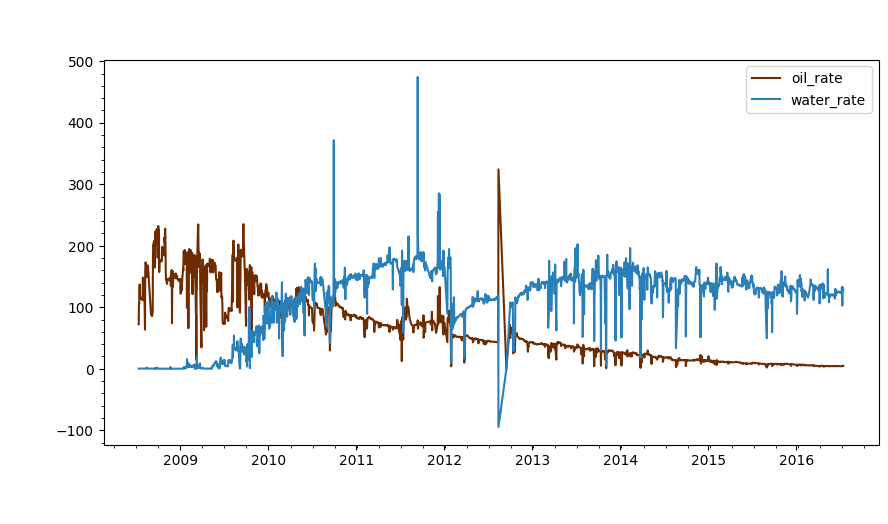

In [14]:

# main figure object
plt.figure(figsize= (10,5))
# make scatter plot between oil and gas production
plt.plot( df["DATEPRD"], df["oil_rate"],color="#6E2C00",label="oil_rate") 
plt.plot(df["DATEPRD"],df["water_rate"],color="#2980B9",label="water_rate");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20,color="#fff")
plt.ylabel("Rate", fontsize= 13, labelpad = 20,color="#fff",loc="center")

# setting figure title 
plt.title("Oil rate vs Water rate with time ", fontsize= 20, pad = 20,color="#fff",loc="left")

# grid 
plt.grid( which="major", linestyle="-", alpha=.3, color="#fff")
plt.minorticks_on()
plt.grid( which="minor", linestyle="--", alpha=.1, color="#fff")
plt.legend();

#### we can see there are anomalies in the production, like the two spikes during 2010 and 2011 i don't think it is normal, also the water production recorded in negative at nearly 7-2012, i don't know what caused this spikes but i will deal with them as outliers
- for the sake of simplicity i will deal with the data until 2012 

In [15]:
# we take the data to be only of the until 2012
df = df[df["DATEPRD"] < "2012"]

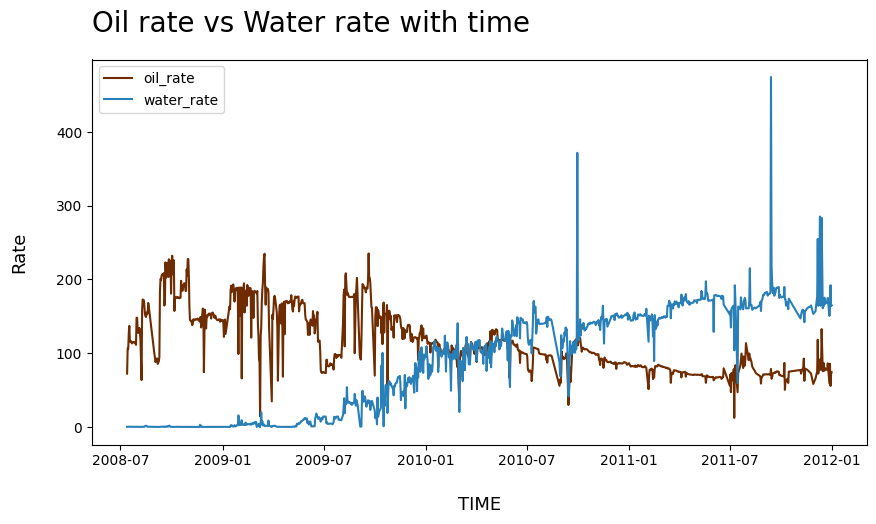

In [16]:
# main figure object
plt.figure(figsize= (10,5))
# make scatter plot between oil and gas production
plt.plot( df["DATEPRD"], df["oil_rate"],color="#6E2C00",label="oil_rate") 
plt.plot(df["DATEPRD"],df["water_rate"],color="#2980B9",label="water_rate");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20,)
plt.ylabel("Rate", fontsize= 13, labelpad = 20,loc="center")

# setting figure title 
plt.title("Oil rate vs Water rate with time ", fontsize= 20, pad = 20,loc="left")

# grid 
plt.legend();

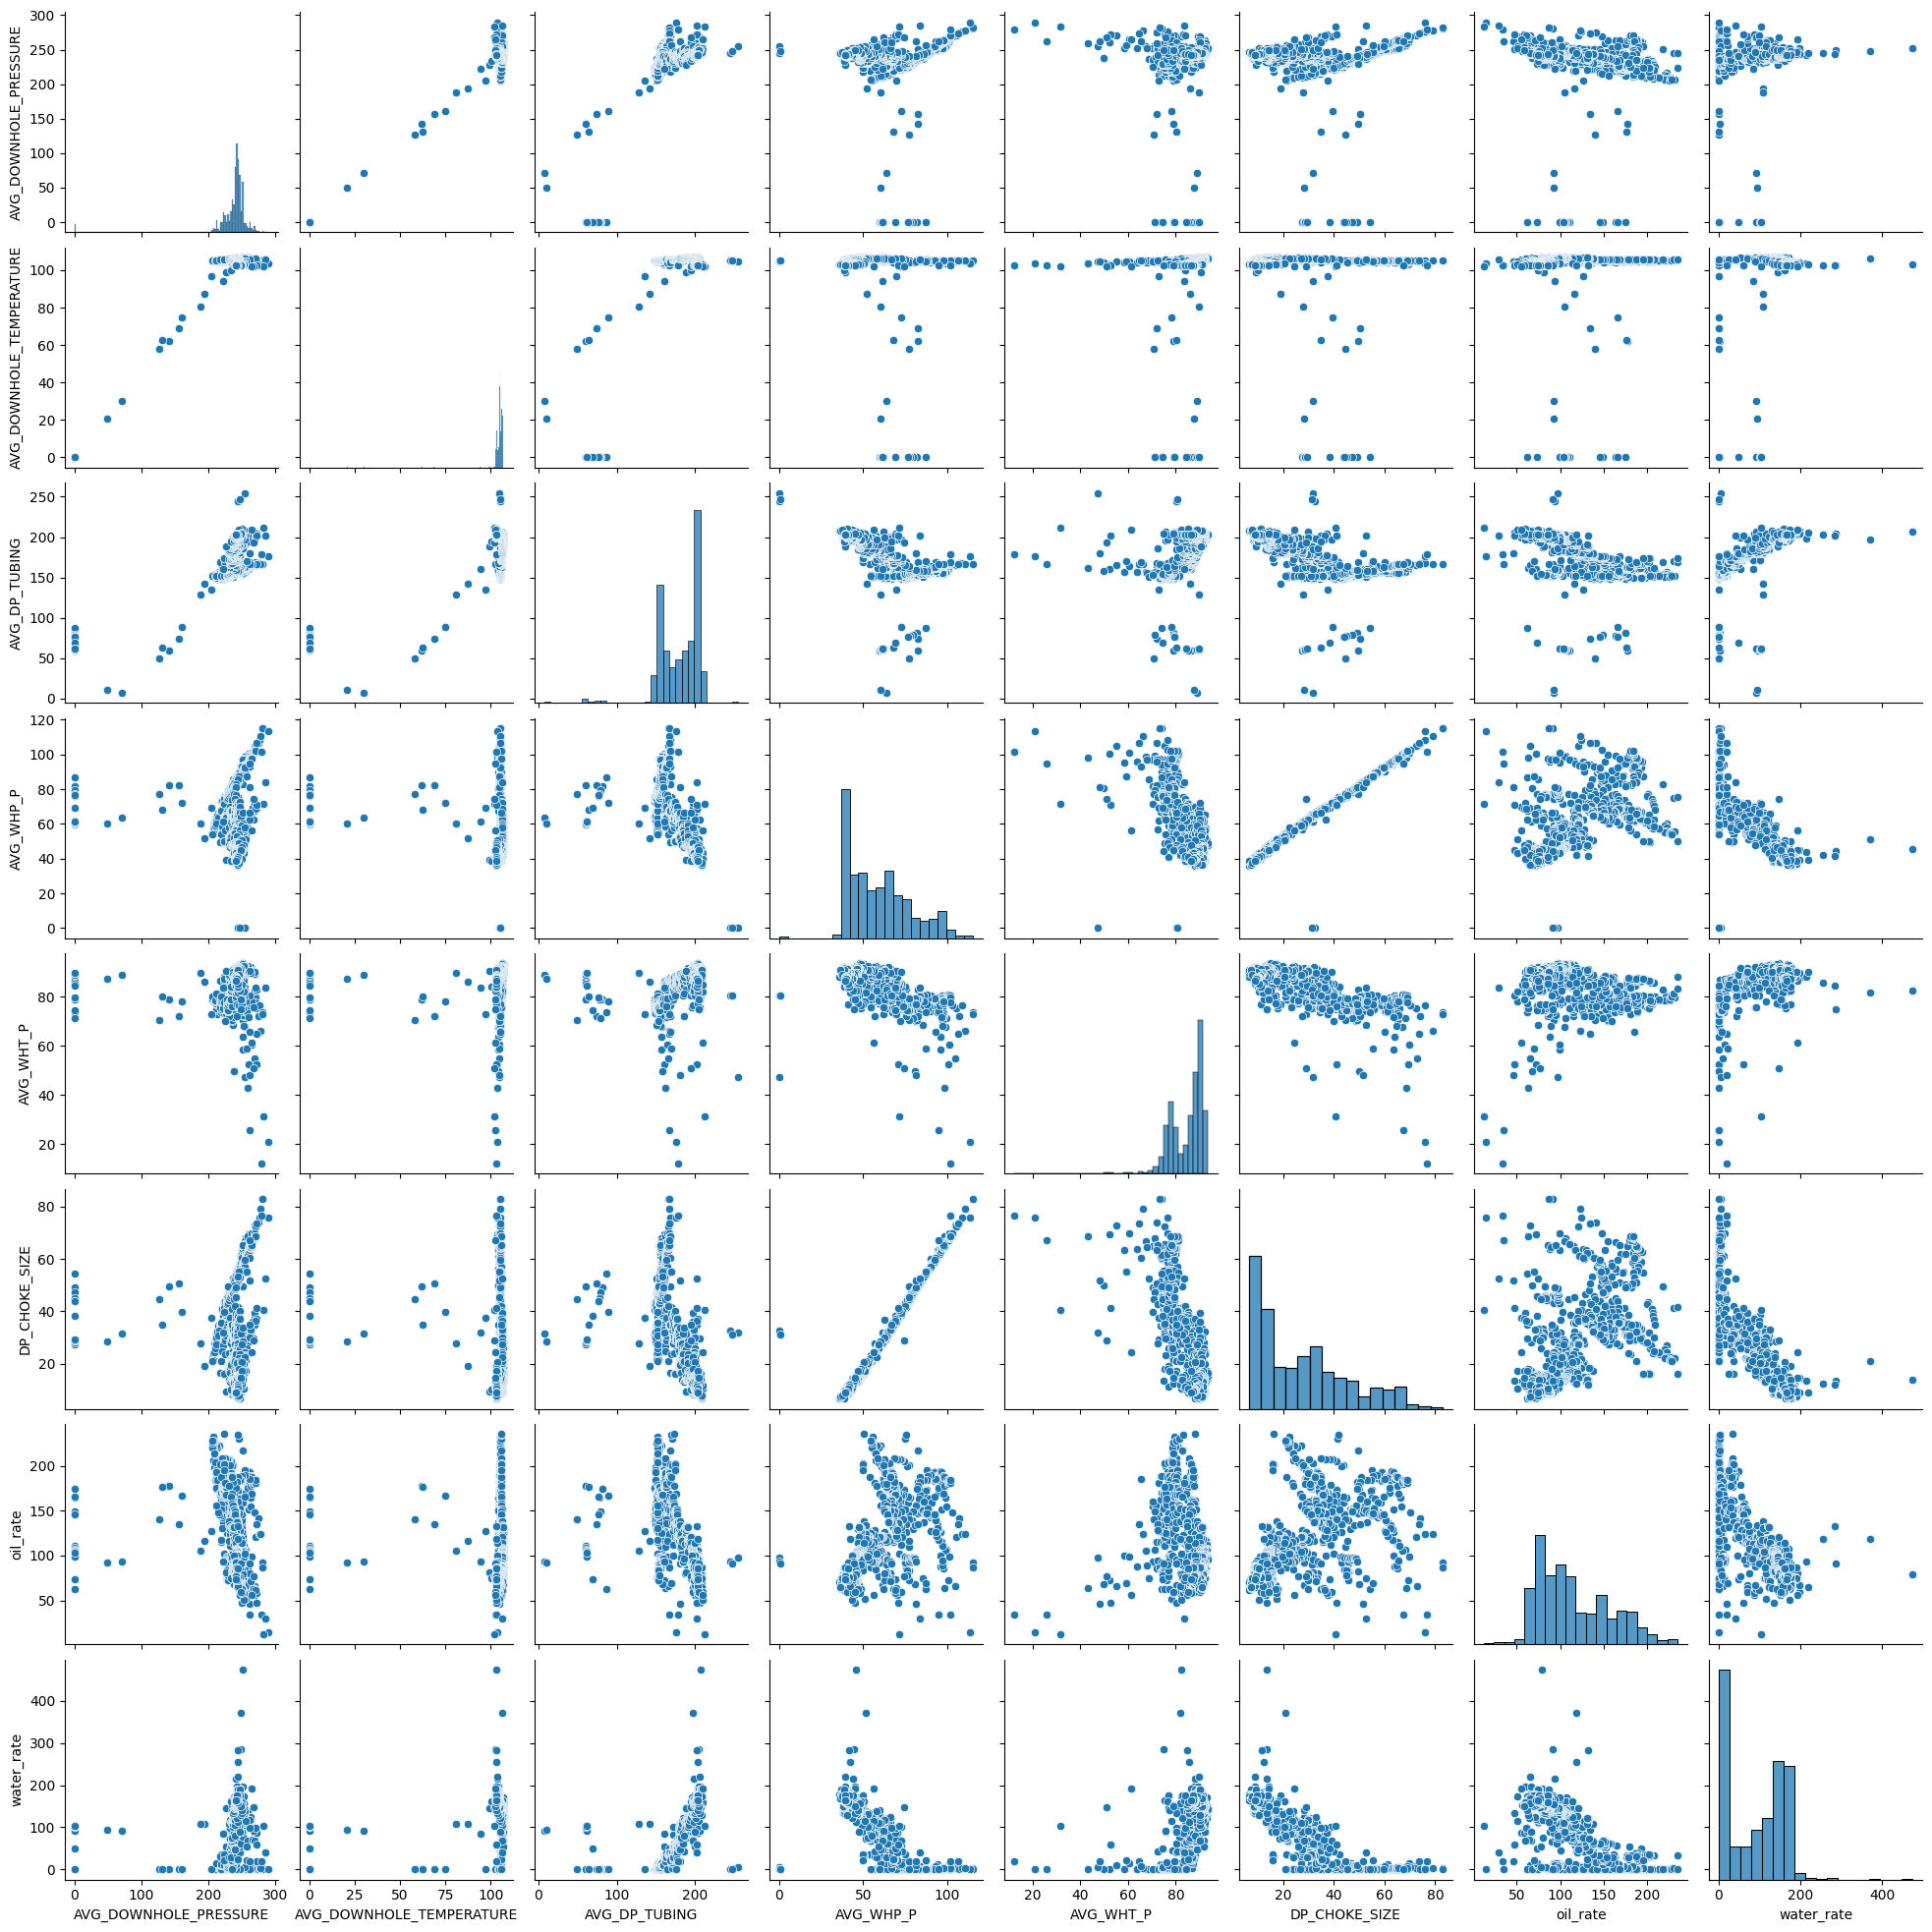

In [17]:
# have a look at all the scatter plots between all variables
sns.pairplot(df);

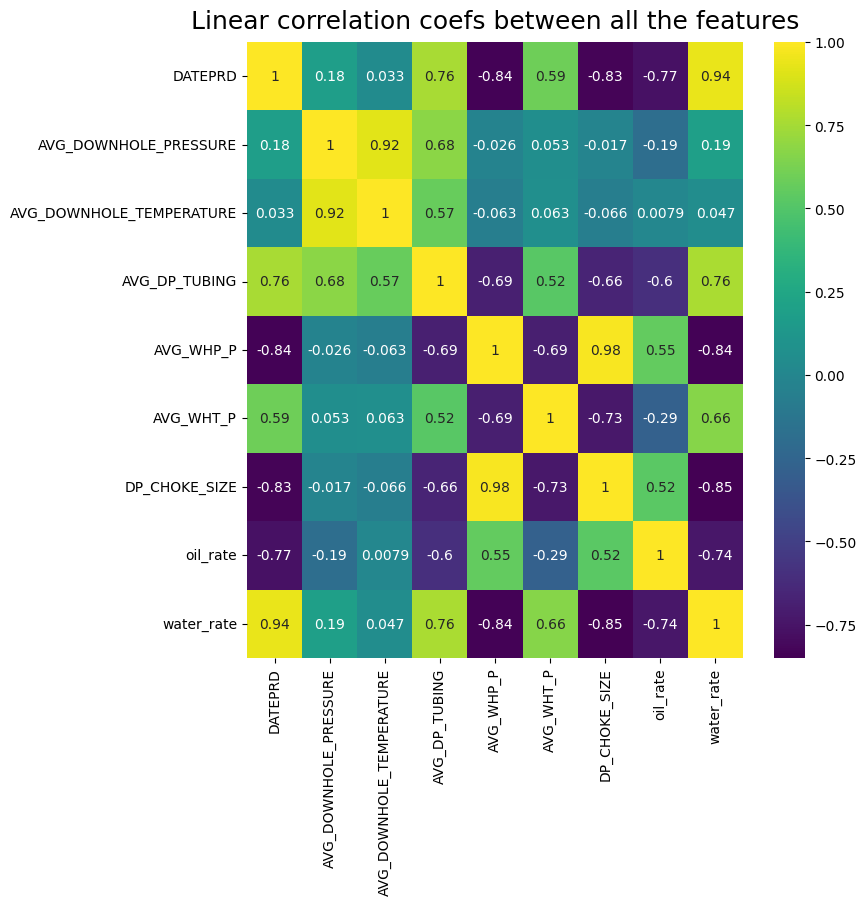

In [18]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df.corr(), annot=True, cmap="viridis");

#### we can conclude that the laest effective freatures if we use linear regression will be the average downhole pressure and temperature for this data 

## <div style="background-color:#F1C40F;padding:15px;border-radius:10px;text-align:center">Data Processing </div>

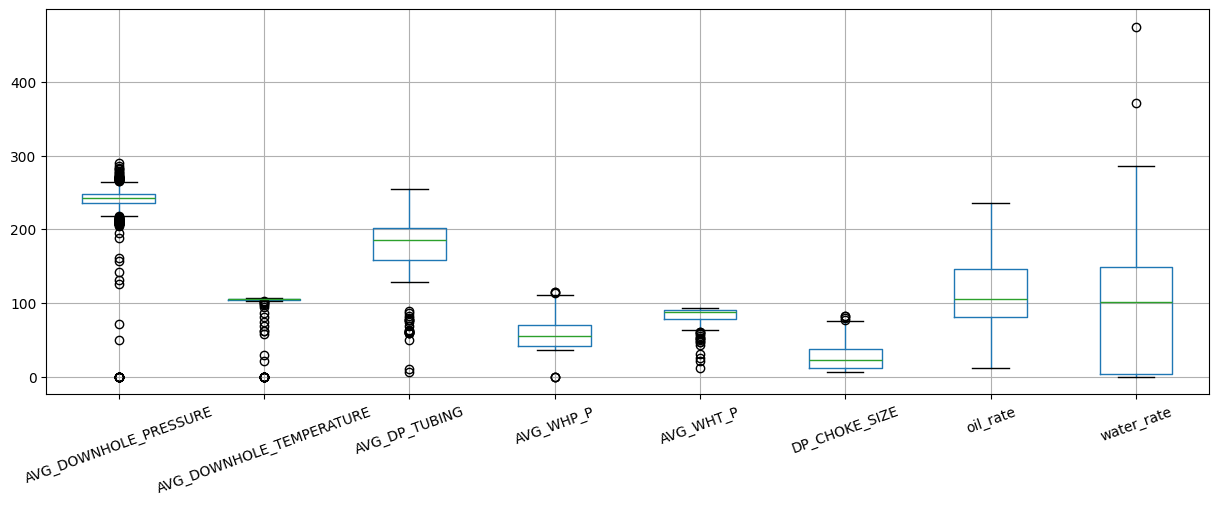

In [19]:
# show the data distribustion to see if there is outliers
plt.figure(figsize=(15,5))
df.boxplot()
plt.xticks(rotation=20);

#### we can see there is reading where average downhole pressure and average downhole temperature and welhead pressure in `zero` which is irrelevant,i assume thay are missing and ony recorded as `zeros`
#### Also we saw previously there are two spikes in the water production and from the boxpot they are outlier diffenetly , i assume 

In [20]:
# remove the zeros form the columns
df = df[df!=0]
df = df[ df.AVG_WHP_P >0]
# remove the water spikes
df = df[df.water_rate < 300]
#remove as i think anomoly data in the average tuping losses 
df = df[df["AVG_DP_TUBING"] > 100]
df = df[ df["AVG_WHP_P"] >10 ]

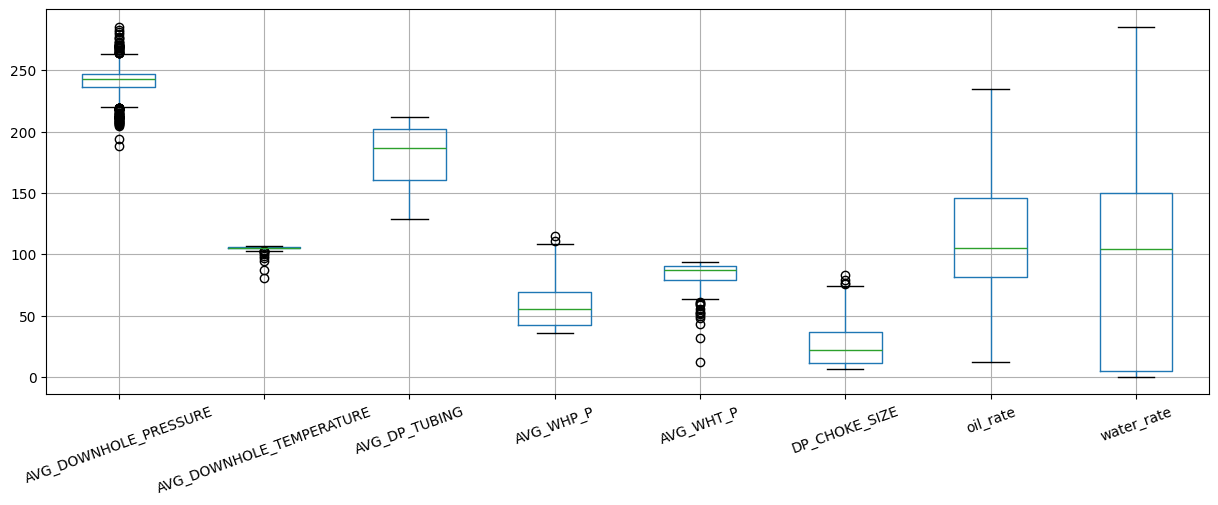

In [21]:
plt.figure(figsize=(15,5))
df.boxplot()
plt.xticks(rotation=20);

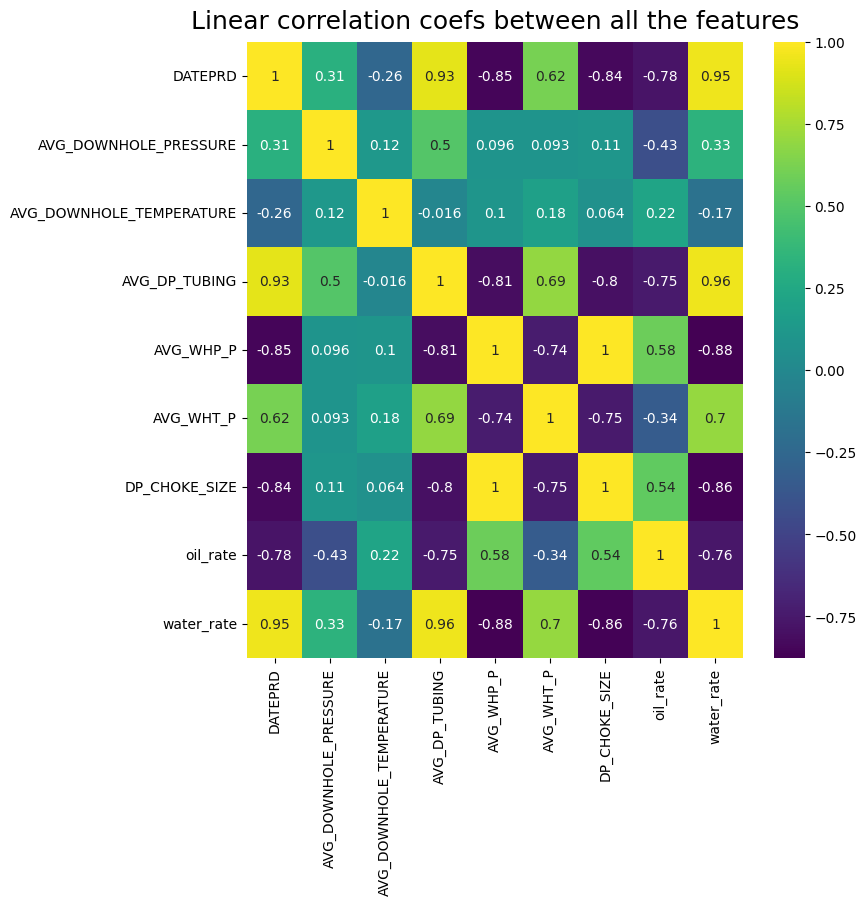

In [22]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df.corr(), annot=True, cmap="viridis");

#### From the linear coefficient we can concolude:
- using the linear regression can do a great jop in prediction the water production as there is a large linear coef between oil rate and the features

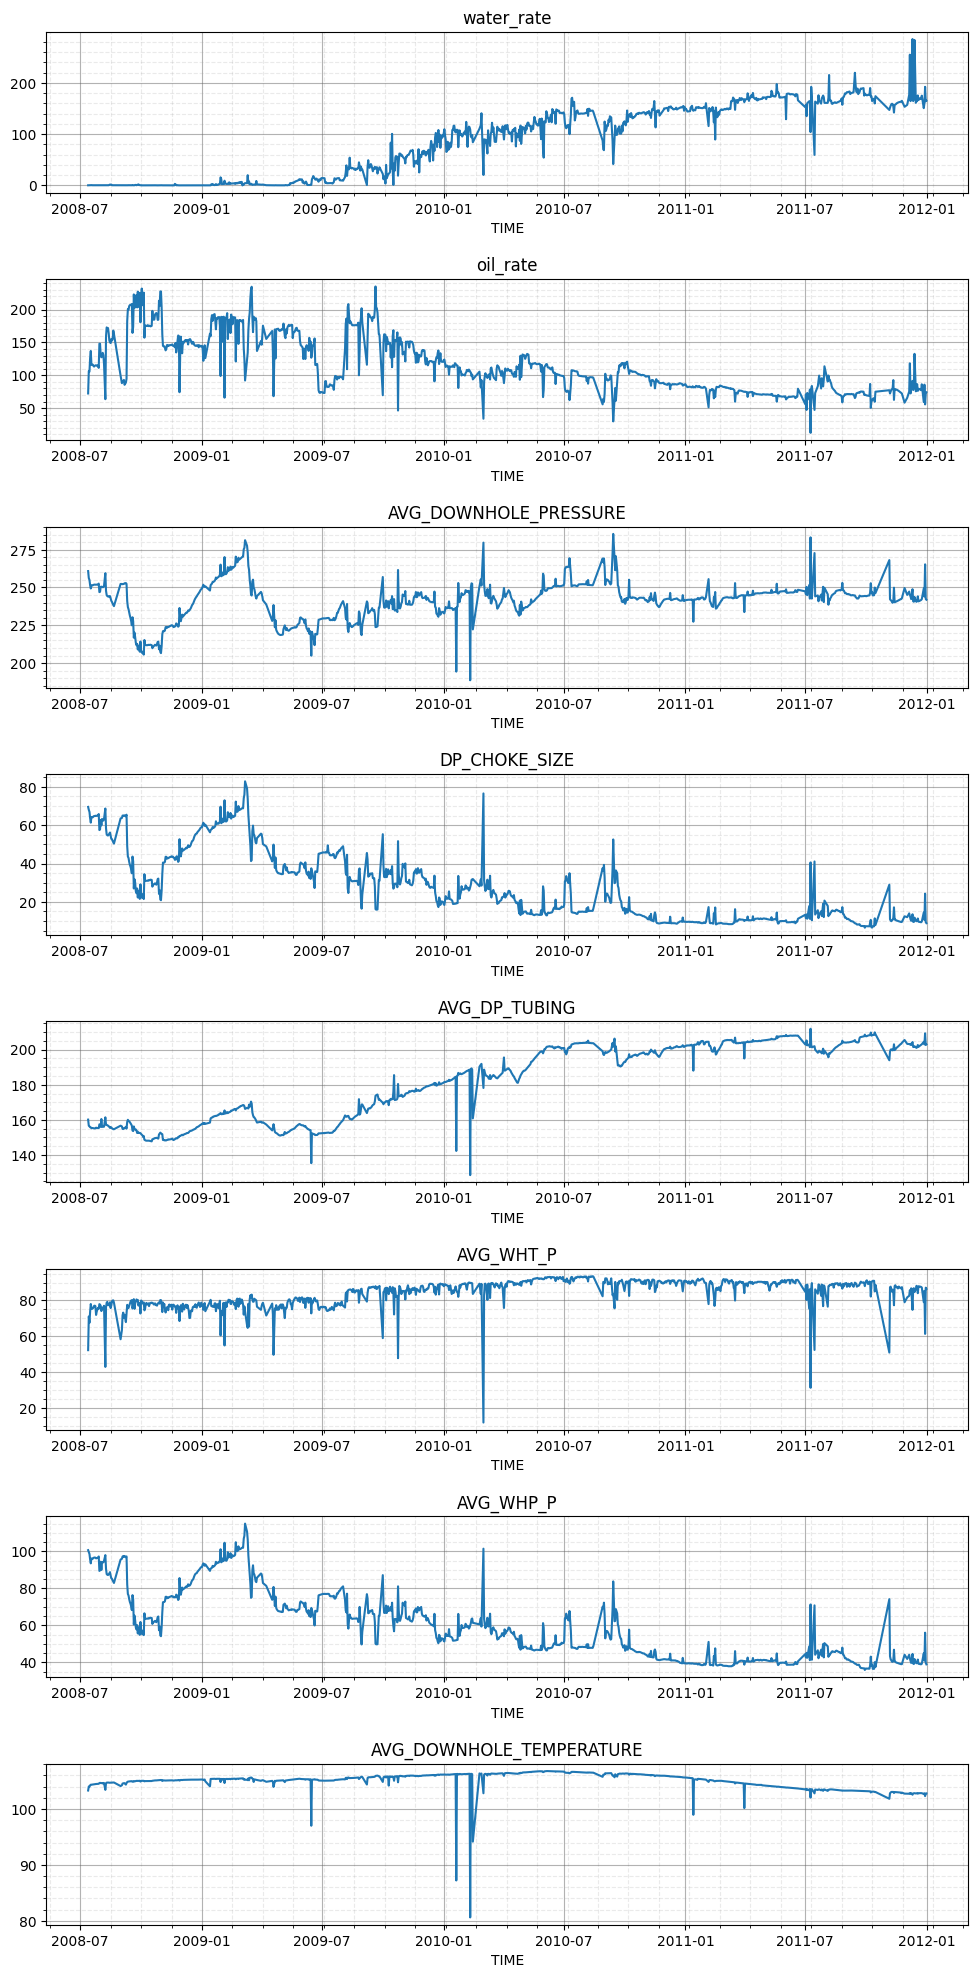

In [23]:
# lets see the variation in the features with time 
plt.figure(figsize= (10,20))
cols = set(list(df.columns)) - set(["DATEPRD"])

for i, col in enumerate(cols) :
    plt.subplot(len(cols),1,i+1)
    # make scatter plot between oil and gas production
    plt.plot( df["DATEPRD"], df[col]) 

    # setting axes (x and y) labels 
    plt.xlabel("TIME" )
    plt.title(col)
    # grid 
    plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
    plt.minorticks_on()
    plt.grid( which="minor", linestyle="--", alpha=.2, color="#9999")
    
plt.tight_layout(pad=1.5)

## <div style="background-color:#F1C40F;padding:15px;border-radius:10px;text-align:center">Building ML Models </div>

In [24]:
# create time feaure
df["days"] = (df["DATEPRD"] - df["DATEPRD"].min()).dt.days

In [25]:
X = df[["days",'AVG_DOWNHOLE_PRESSURE',"AVG_DOWNHOLE_TEMPERATURE",'AVG_DP_TUBING'
     ,'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE']]
y = df[['oil_rate', 'water_rate']]

# splitting the data to frecast 
train_size=  int(.8 * len(X))
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

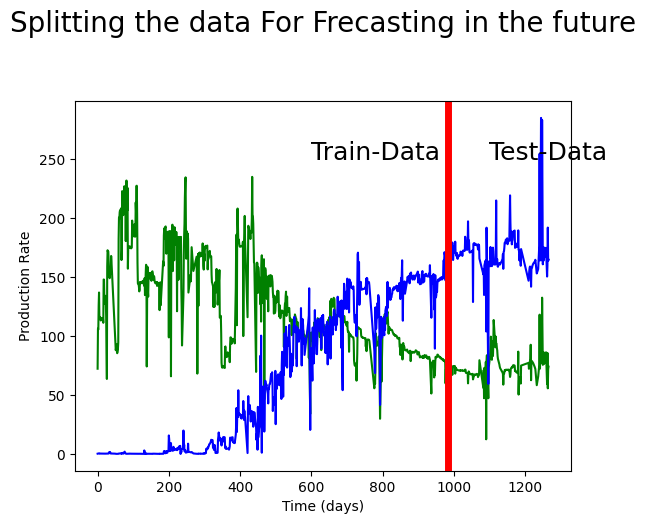

In [28]:
plt.title("Splitting the data For Frecasting in the future",fontsize=20,pad=50)
plt.plot(X_train["days"],y_train["oil_rate"],color="green")
plt.plot(X_train["days"],y_train["water_rate"],color="blue")
plt.plot(X_test["days"],y_test["oil_rate"],color="green")
plt.plot(X_test["days"],y_test["water_rate"],color="blue")
plt.xlabel("Time (days)")
plt.ylabel("Production Rate")
plt.axvline(x = X["days"].iloc[train_size], color = 'red', label = 'axvline - full height',linewidth=5);
plt.annotate('Train-Data', xy=(600, 250), xytext=(600, 250),fontsize=18)
plt.annotate('Test-Data', xy=(600, 250),  xytext=(1100, 250),fontsize=18);
 

In [29]:
!C:\Users\adhya\AppData\Local\Programs\Python\Python39\python.exe -m pip install install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 5.0 MB/s eta 0:00:21
   ---------------------------------------- 0.3/99.8 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 0.5/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.6/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.7/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.8/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.9/99.8 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 1.1/99.8 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 1.2/99.8 MB 2.9 MB/s eta 0:00:34
    --------------------------------------- 1.3/99.8 MB 2.8 MB/s eta 0:00:35
    --------------------------------------- 1.4/99.8 MB 2.9 MB/s eta 0:00:35
    --------------------------------------- 1.5/99.8 MB 2.8 MB/s eta 0:00:35
    --

In [30]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression

# caclulate mean absolute error in each
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

## XGBoost Model

In [31]:
# the parameter are found after gridsearch among possible groups and found the following are the best to use
xbg = XGBRegressor(max_depth=10,n_estimators=1000,objective="reg:squarederror",gamma=.3)
xbg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
## make a function to show the model evaluationis
def eval(model):
    # get the mean absolute error
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    oil_mae = mean_absolute_error(y_test["oil_rate"],y_pred[:,0])
    oil_r2 = r2_score(y_test["oil_rate"],y_pred[:,0])
    water_mae = mean_absolute_error(y_test["water_rate"],y_pred[:,1])
    water_r2 = r2_score(y_test["water_rate"],y_pred[:,1])
    print(f" Oil MAE :{oil_mae} , R2 :{oil_r2}")
    print(f" Water MAE :{water_mae} , R2 :{water_r2}")
    
    # show the result
    plt.figure(figsize=(10,6))
    plt.title("Show model results",fontsize=20,pad=40)
    plt.plot(X_test["days"],y_pred[:,0],color="#F1C40F",label="oil_prdiction")
    plt.plot(X_test["days"],y_pred[:,1],color="#40E0D0",label="water_prediction")
    plt.plot(X_test["days"],y_test["oil_rate"],color="#D35400",label="True_oil")
    plt.plot(X_test["days"],y_test["water_rate"],color="blue",label="True-Water")
    plt.plot(X_train["days"],y_train["oil_rate"],color="#D35400")
    plt.plot(X_train["days"],y_train["water_rate"],color="blue")
    plt.axvline(x = X["days"].iloc[train_size], color = 'red',linewidth=3, label = 'Begining of Prediciton');
    plt.legend();
    

 Oil MAE :7.817350495758662 , R2 :-0.10779062316025767
 Water MAE :17.265019217957978 , R2 :-0.7534113057382126


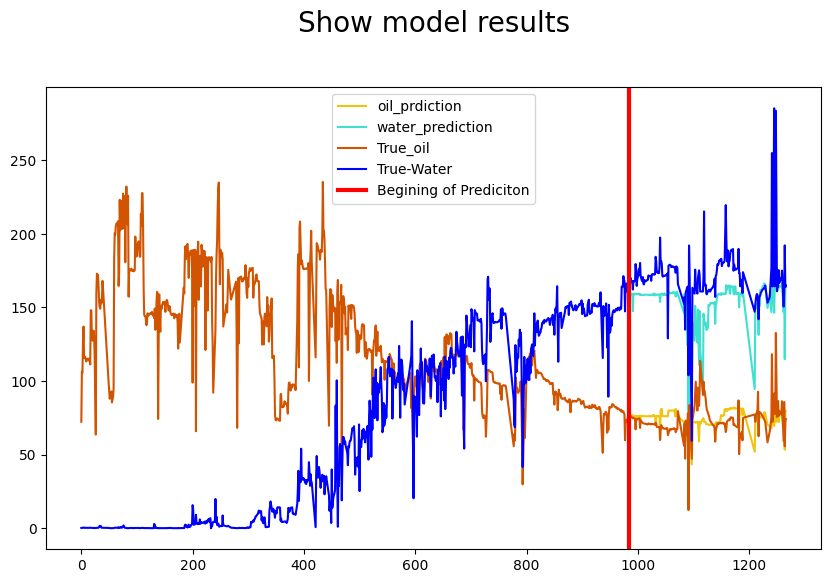

In [38]:
# evaluate the xbgboost
eval(xbg)

#### We can see the model is pad in water prediction and fairly good at oil prediction

## linear regression

 Oil MAE :30.757181535314903 , R2 :-10.441321432191124
 Water MAE :10.534394570540277 , R2 :-0.004944188815558581


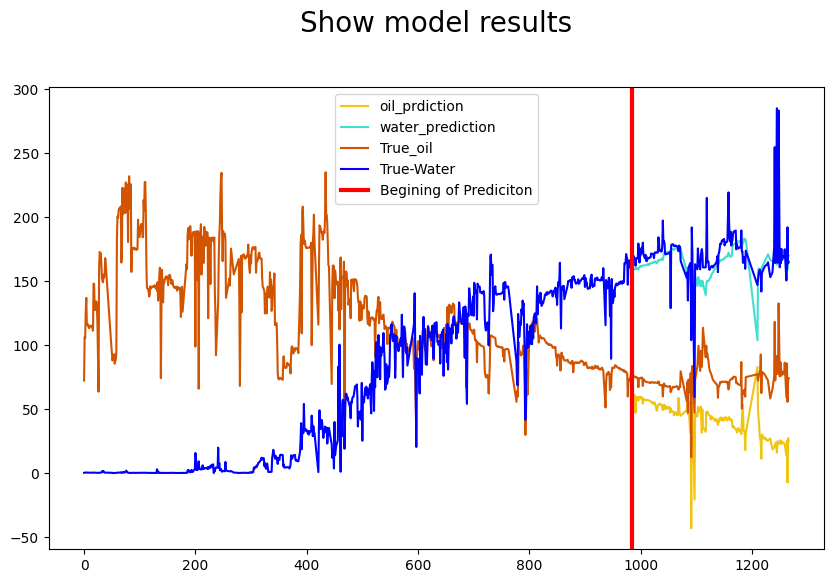

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
eval(lr)

## Combine the two models 
- XGboost for `oil`
- Linear Regression for `water`

In [41]:
def combined_model(X_train,y_train):
    lr = LinearRegression()
    xbg = XGBRegressor(max_depth=10,n_estimators=1000,objective="reg:squarederror",gamma=.3)
    xbg.fit(X_train,y_train)
    lr.fit(X_train,y_train)

In [42]:
class CombinedModel:
    def __init__(self):
        self.xgb= XGBRegressor(max_depth=10,n_estimators=1000,objective="reg:squarederror",gamma=.3)
        self.lr = LinearRegression()
        
    def train(self,X_train,y_train):
        self.x_train = X_train
        self.y_train = y_train
        self.xgb.fit(X_train,y_train)
        self.lr.fit(X_train,y_train)
        
    def predict(self,X_test):
        self.x_test = X_test
        self.oil_pred = self.xgb.predict(X_test)[:,0]
        self.water_pred = self.lr.predict(X_test)[:,1]
        
    def evaluate(self,y_test):
        self.y_test = y_test
        oil_mae = mean_absolute_error(y_test["oil_rate"],self.oil_pred)
        oil_mape = mean_absolute_percentage_error(y_test["oil_rate"],self.oil_pred)
        water_mae = mean_absolute_error(y_test["water_rate"],self.water_pred)
        water_mape = mean_absolute_percentage_error(y_test["water_rate"],self.water_pred)
        print(f" Oil MAE :{oil_mae} , MAPE :{oil_mape}")
        print(f" Water MAE :{water_mae} , MAPE :{water_mape}")
        
    def show_results(self):
        # show the result
        plt.figure(figsize=(10,8),dpi=500)
        plt.title("Show model Predictions",fontsize=20,pad=40)
        plt.plot(self.x_test["days"],self.y_test["oil_rate"],color="#D35400",label="True_oil")
        plt.plot(self.x_test["days"],self.y_test["water_rate"],color="blue",label="True-Water")
        plt.plot(self.x_test["days"],self.oil_pred,color="#F1C40F",label="oil_prdiction")
        plt.plot(self.x_test["days"],self.water_pred,color="#40E0D0",label="water_prediction")
        plt.plot(self.x_train["days"],self.y_train["oil_rate"],color="#D35400")
        plt.plot(self.x_train["days"],self.y_train["water_rate"],color="blue")
        plt.axvline(x = self.x_train["days"].iloc[-1], color = '#fff',linewidth=3, label = 'Begining of Prediciton');
        plt.xlabel("Time (days)")
        plt.ylabel("Production_Rate")
        plt.legend();
        plt.savefig("final2.png")
    
        


 Oil MAE :7.817350495758662 , MAPE :0.10998801668617729
 Water MAE :10.534394570540277 , MAPE :0.06172785599335891


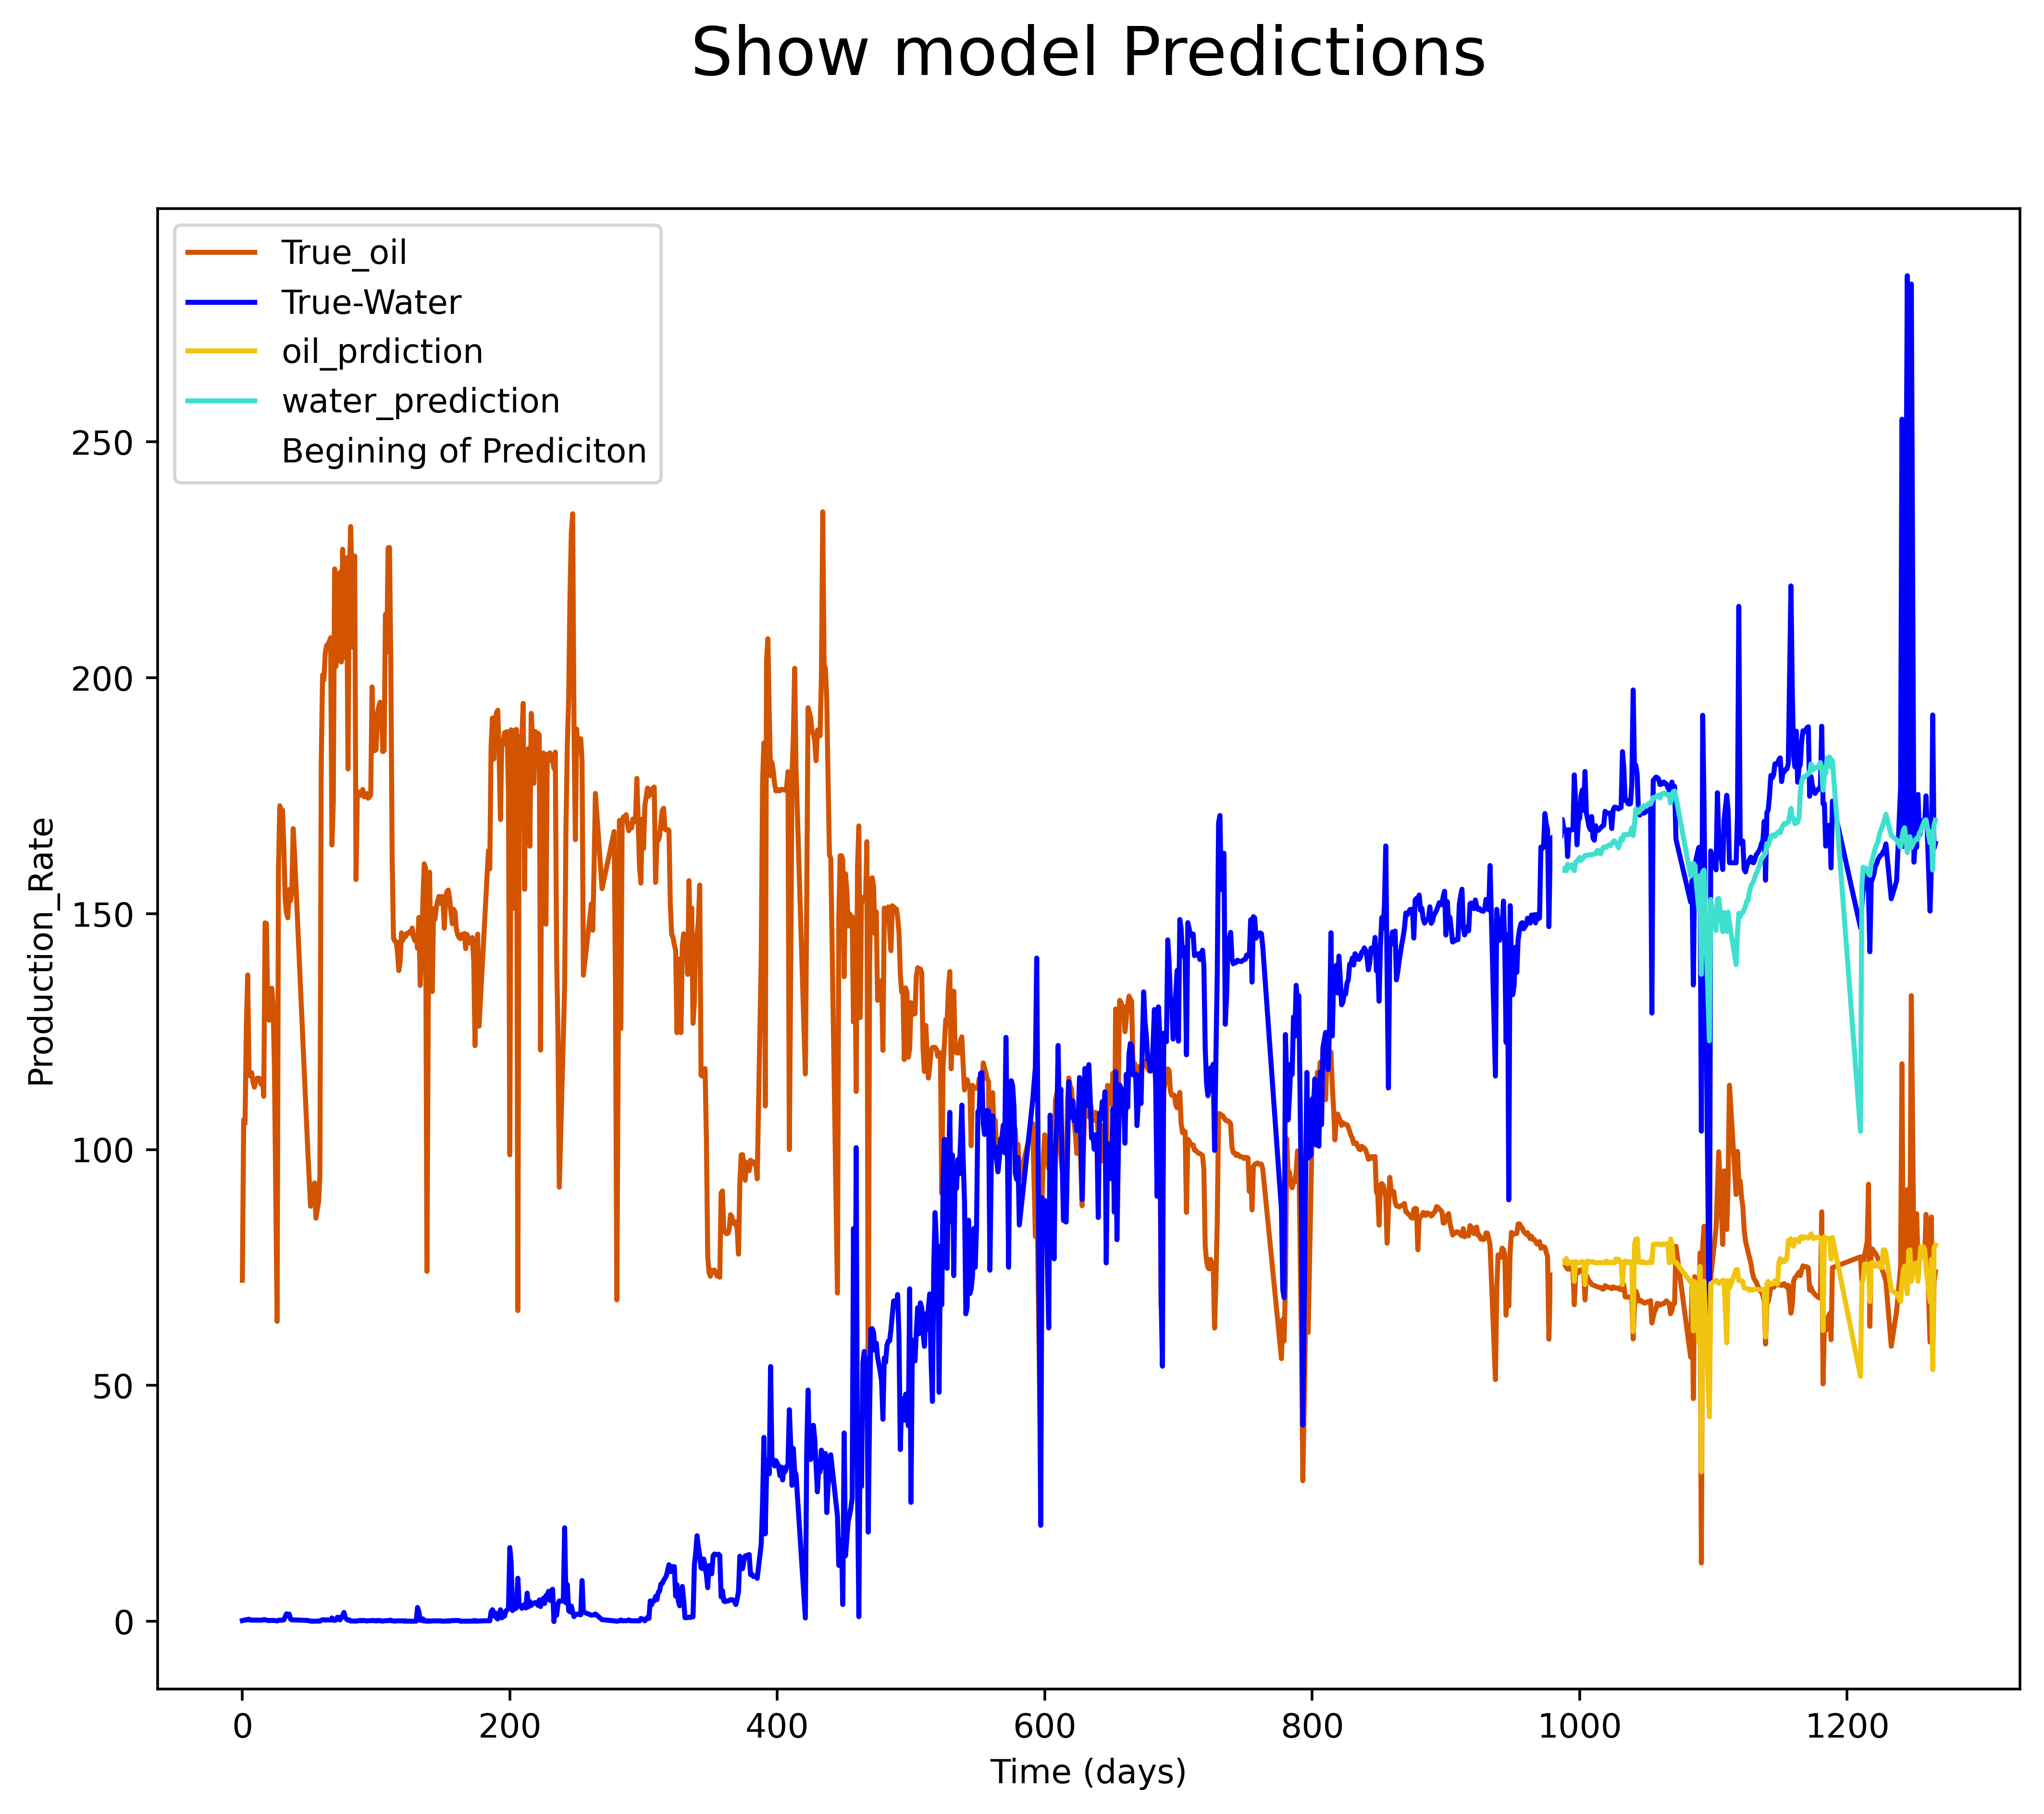

In [43]:
model = CombinedModel()
model.train(X_train,y_train)
model.predict(X_test)
model.evaluate(y_test)
model.show_results()

### With some tinkering and tuning the model can be improved drastically!
### I hope you enjoyed this notebook and learned something new
## Thank you